In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Kwabs Digital\Downloads\FuelConsumptionCo2 (1).csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [3]:
df.head(5)  # first 5 rows


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [5]:
# display 9 random samples from selected columns
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.sample(9)



,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
1032,2.0,4,7.2,194
298,5.7,8,13.1,301
634,5.2,10,15.7,361
278,3.6,6,14.4,230
746,3.5,6,8.8,202
26,3.0,6,10.9,251
32,3.0,6,8.4,227
648,5.0,8,20.7,331
1010,2.7,4,10.2,235


## Visualisation of features 

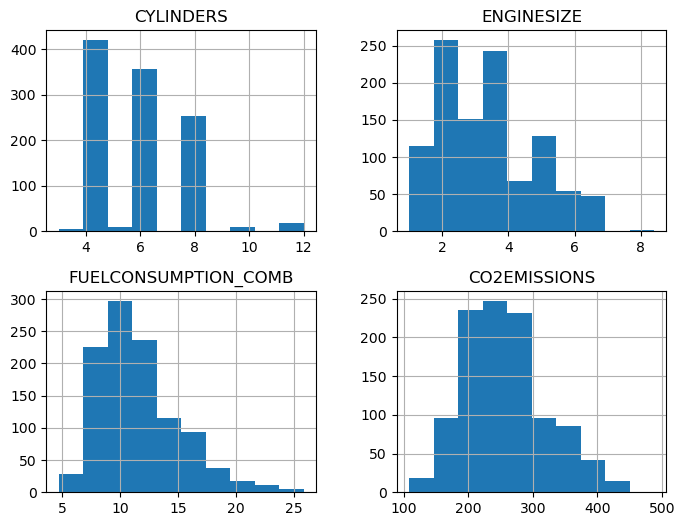

In [6]:
# visualize distributions of selected features
viz = cdf[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
viz.hist(figsize=(8, 6))
plt.show()



#### Most engines have 4, 6, or 8 cylinders, with sizes ranging from 2 to 4 liters.
#### As expected, combined fuel consumption and CO₂ emissions exhibit very similar distributions.


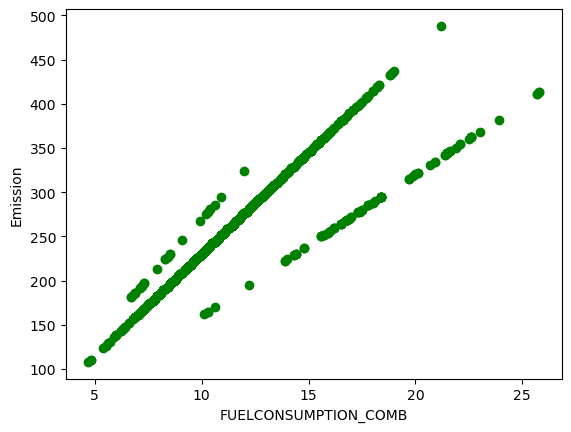

In [7]:
# scatter plot of fuel consumption vs CO2 emissions
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='green')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()


## Extract the input feature and labels from the dataset

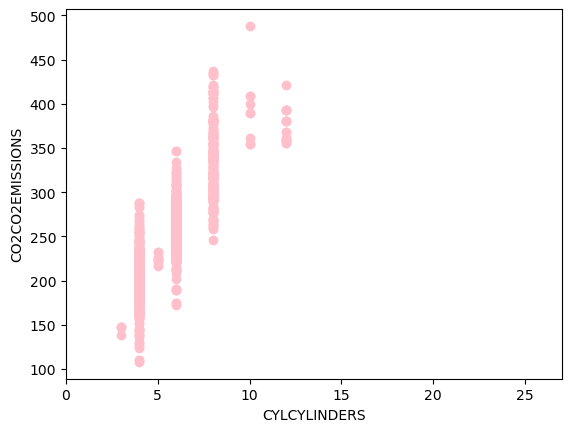

In [8]:
# write your code here
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,color = 'pink')
plt.xlabel("CYLCYLINDERS")
plt.ylabel("CO2CO2EMISSIONS")
plt.xlim(0,27)
plt.show()

In [9]:
# convert selected columns to numpy arrays
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()


## Creating and splitting the dataset

In [10]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# check the type and shape of training data
type(X_train), np.shape(X_train), np.shape(X_train)


(numpy.ndarray, (853,), (853,))

In [12]:
# train a simple linear regression model
from sklearn import linear_model

regressor = linear_model.LinearRegression()
regressor.fit(X_train.reshape(-1, 1), y_train)

print('Coefficients:', regressor.coef_[0])
print('Intercept:', regressor.intercept_)


Coefficients: 38.992978724434046
Intercept: 126.2897021740873


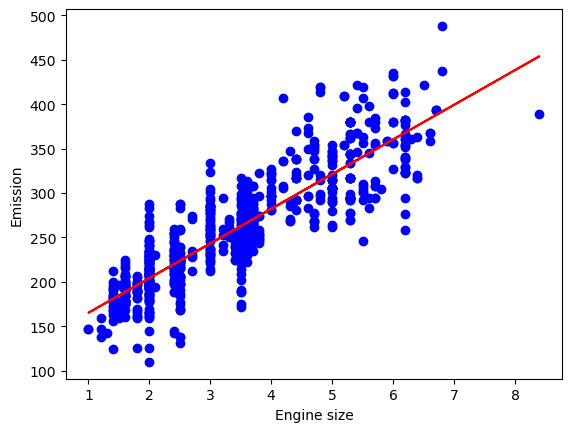

In [13]:
# visualize training data and regression line
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()


## Building a simple regression model

In [14]:
# evaluate model performance on test data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_test_ = regressor.predict(X_test.reshape(-1, 1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))


Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.76


## Visualizing output models

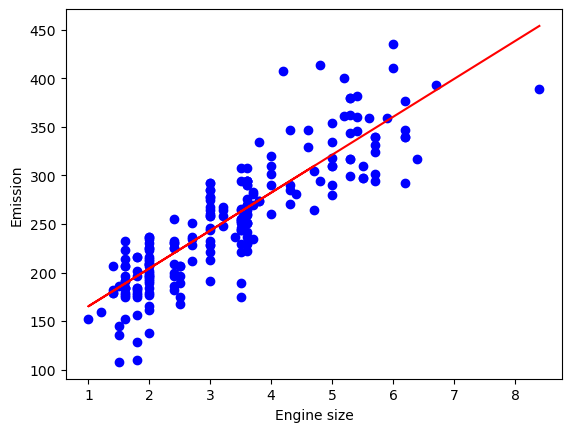

In [15]:
# visualize test data and regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, regressor.coef_ * X_test + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()


## Model Evaluation

In [16]:
# split data using fuel consumption as the feature
X = cdf.FUELCONSUMPTION_COMB.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# train a new linear regression model using fuel consumption
regr = linear_model.LinearRegression()
regr.fit(X_train.reshape(-1, 1), y_train)


LinearRegression()

In [18]:
# make predictions on the test set
y_test_ = regr.predict(X_test.reshape(-1, 1))


In [19]:
# display mean squared error for the model
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))


Mean squared error: 797.43


### Predict the CO₂ emissions using engine size and fuel consumption.

In [20]:
# function to predict CO2 emissions using engine size or fuel consumption
def predict_co2_emissions(engine_size=None, fuel_consumption=None):
    """
    Predict CO2 emissions using either engine size or fuel consumption
    """
    if fuel_consumption is not None:
        prediction = regr.predict([[fuel_consumption]])
        print(f"Based on fuel consumption ({fuel_consumption}L/100km):-")
        print(f"\tPredicted CO2 emissions: {prediction[0]:.2f} g/km\n\n")
        return prediction[0]
    
    elif engine_size is not None:
        prediction = regressor.predict([[engine_size]])
        print(f"Based on engine size ({engine_size}L):-")
        print(f"\tPredicted CO2 emissions: {prediction[0]:.2f} g/km\n\n")
        return prediction[0]
    
    else:
        print("Please provide either engine_size or fuel_consumption")
        return None


In [21]:
# example usage
predict_co2_emissions(fuel_consumption=9.5)
predict_co2_emissions(engine_size=2.8)


Based on fuel consumption (9.5L/100km):-
	Predicted CO2 emissions: 222.82 g/km


Based on engine size (2.8L):-
	Predicted CO2 emissions: 235.47 g/km




np.float64(235.47004260250262)